### EDA - Visualise Missing Data
Visualise missing data 

In [1]:
import operator
import math
import random
import pandas as pd
import datetime as dt
import numpy as np
import os
import urllib
import json
import requests
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from eod import EodHistoricalData
#import pandas_datareader as pdr
#import yfinance as yf
#import talib

from functools import partial

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp

pd.set_option('display.max_rows', None)

In [2]:
#paths for data - set prefix to location of Data folder
path_prefix = r'C:\Users\OEM\GDrive\WQU'
path_att = r'\Data\fundamentals_by_attribute'
path_fun = r'\Data\fundamentals_by_ticker'
path_std = r'\Data\standardised_fundamentals'
path_eda = r'\Data\exploratory_data_analysis'

In [3]:
api_key = "618f834b7bfe27.18132752"

In [4]:
client = EodHistoricalData(api_key)

In [5]:
resp = client.get_exchange_symbols(exchange='NYSE')

In [6]:
filepath = Path(path_prefix + path_std)

In [7]:
os.chdir(filepath)

In [8]:
files = [f for f in os.listdir() if os.path.isfile(f)]

In [9]:
df_std = pd.read_csv(path_prefix + path_std + '\df_fun_AA.csv', index_col=0)
df_eda = pd.read_csv(path_prefix + path_eda + '\df_eda_totalAssets.csv', index_col=0)
df_att = pd.read_csv(path_prefix + path_att + '\df_totalAssets.csv', index_col=0)

In [10]:
cols = df_std.columns
idx = df_eda.index
df_agg_mean = pd.DataFrame(None, index = idx, columns=cols, dtype=np.float64)

In [11]:
for col in cols:
    filepath = Path(path_prefix + path_eda + '\df_eda_{}.csv'.format(col))
    if os.path.isfile(filepath) == True:
        df = pd.read_csv(filepath, parse_dates=True, index_col=0)
        print(filepath)
        idx = df.index
        for row in idx:
            if row != 'earliest_val':
                df_asfloat = df.loc[row].astype(float)
                mean = df_asfloat.mean()
                df_agg_mean.loc[row, col] = mean

C:\Users\OEM\GDrive\WQU\Data\exploratory_data_analysis\df_eda_totalAssets.csv
C:\Users\OEM\GDrive\WQU\Data\exploratory_data_analysis\df_eda_intangibleAssets.csv
C:\Users\OEM\GDrive\WQU\Data\exploratory_data_analysis\df_eda_earningAssets.csv
C:\Users\OEM\GDrive\WQU\Data\exploratory_data_analysis\df_eda_otherCurrentAssets.csv
C:\Users\OEM\GDrive\WQU\Data\exploratory_data_analysis\df_eda_totalLiab.csv
C:\Users\OEM\GDrive\WQU\Data\exploratory_data_analysis\df_eda_totalStockholderEquity.csv
C:\Users\OEM\GDrive\WQU\Data\exploratory_data_analysis\df_eda_deferredLongTermLiab.csv
C:\Users\OEM\GDrive\WQU\Data\exploratory_data_analysis\df_eda_otherCurrentLiab.csv
C:\Users\OEM\GDrive\WQU\Data\exploratory_data_analysis\df_eda_commonStock.csv
C:\Users\OEM\GDrive\WQU\Data\exploratory_data_analysis\df_eda_capitalStock.csv
C:\Users\OEM\GDrive\WQU\Data\exploratory_data_analysis\df_eda_retainedEarnings.csv
C:\Users\OEM\GDrive\WQU\Data\exploratory_data_analysis\df_eda_otherLiab.csv
C:\Users\OEM\GDrive\WQU

In [12]:
df_agg_mean

,totalAssets,intangibleAssets,earningAssets,otherCurrentAssets,totalLiab,totalStockholderEquity,deferredLongTermLiab,otherCurrentLiab,commonStock,capitalStock,...,totalRevenue,totalOperatingExpenses,costOfRevenue,totalOtherIncomeExpenseNet,discontinuedOperations,netIncomeFromContinuingOps,netIncomeApplicableToCommonShares,preferredStockAndOtherAdjustments,prev_close,adjusted_close
count,7.670250e+01,5.184808e+01,3.376806e-01,6.520338e+01,7.642474e+01,7.646599e+01,2.385513e+01,7.087980e+01,6.443814e+01,8.473387e+00,...,8.045275e+01,7.757158e+01,6.755148e+01,7.435402e+01,3.629372e+01,5.185614e+01,5.171897e+01,4.347673e+00,NaN,NaN
mean,9.549797e+11,1.597632e+10,7.752461e+12,-7.610250e+11,7.707162e+11,1.664967e+11,2.173978e+09,-2.633565e+12,2.971534e+10,2.795678e+10,...,4.059977e+10,6.685730e+09,1.659298e+13,-1.491435e+11,3.814901e+07,3.212111e+09,1.836449e+09,1.478088e+07,NaN,NaN
std,6.811441e+11,1.951336e+10,7.883508e+11,9.253071e+12,5.478424e+11,1.599925e+11,2.058725e+09,3.124163e+13,5.129752e+10,3.105939e+08,...,2.785924e+10,2.428779e+10,1.345744e+14,3.868054e+11,1.993684e+08,7.556009e+09,4.622758e+09,9.774987e+06,NaN,NaN
min,3.903881e+10,-7.321339e+08,6.666181e+12,-8.145643e+13,2.363274e+10,6.232819e+09,1.692147e+08,-3.566983e+14,7.458058e+08,2.764122e+10,...,-2.823055e+09,-5.754758e+10,-5.792737e+09,-1.238136e+12,-2.606488e+08,-2.128681e+10,-8.429414e+09,6.539311e+05,NaN,NaN
25%,4.476624e+11,5.406688e+09,7.168406e+12,2.383168e+11,3.470913e+11,7.989299e+10,9.017140e+08,-9.481607e+09,1.503532e+10,2.775533e+10,...,2.193295e+10,2.156709e+09,1.105070e+10,-4.015692e+09,-6.619408e+06,1.386041e+08,1.124853e+08,1.032026e+07,NaN,NaN
50%,9.427444e+11,1.195097e+10,7.731834e+12,4.149759e+11,7.767590e+11,1.386867e+11,2.166196e+09,9.615932e+09,2.345679e+10,2.791565e+10,...,3.874679e+10,9.627396e+09,2.293757e+10,-1.312270e+09,-1.644302e+06,8.517405e+08,4.081227e+08,1.444486e+07,NaN,NaN
75%,1.317551e+12,2.221676e+10,8.235526e+12,5.409333e+11,1.074785e+12,1.997320e+11,2.999408e+09,3.715486e+10,2.585824e+10,2.810086e+10,...,5.458544e+10,1.467933e+10,9.249251e+10,2.513398e+08,2.736073e+06,5.639752e+09,1.984339e+09,1.870160e+07,NaN,NaN
max,2.708214e+12,8.922614e+10,8.992345e+12,8.375474e+11,2.268499e+12,6.538215e+11,6.285211e+09,9.174703e+11,2.276884e+11,2.845165e+10,...,1.219972e+11,6.854310e+10,1.097576e+15,2.793723e+10,8.877118e+08,3.309111e+10,1.707348e+10,3.194453e+07,NaN,NaN
earliest_val,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pct_nan,4.267365e+00,2.709249e+01,9.823752e+01,1.371397e+01,4.331097e+00,4.337855e+00,4.445150e+01,9.678609e+00,8.324659e+00,1.138520e+01,...,2.511301e+00,4.249220e+00,1.039720e+01,4.633725e+00,5.171878e+01,7.154996e+00,1.176766e+01,8.536838e+01,NaN,NaN


In [13]:
mean_pct_nans = df_agg_mean.loc['pct_nan'].sort_values(ascending=False)

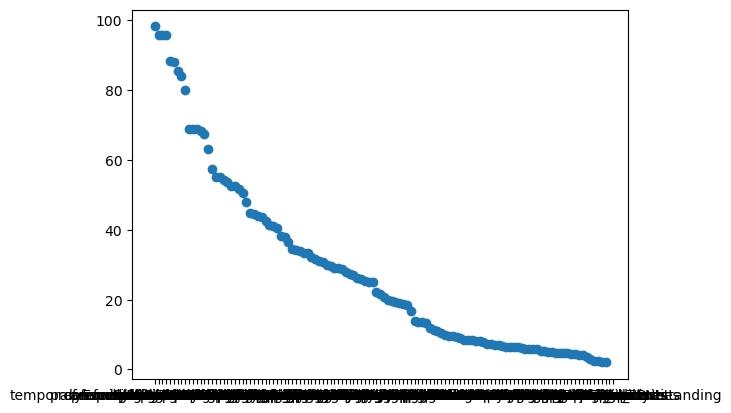

In [17]:
plt.scatter(mean_pct_nans.index, mean_pct_nans)

In [25]:
mean_pct_nans

earningAssets                                       98.237525
accumulatedAmortization                             95.701176
negativeGoodwill                                    95.701176
preferredStockRedeemable                            95.616165
accumulatedDepreciation                             88.293147
deferredLongTermAssetCharges                        87.976100
preferredStockAndOtherAdjustments                   85.368378
warrants                                            83.976362
exchangeRateChanges                                 80.145667
totalPermanentEquity                                68.975164
temporaryEquityRedeemableNoncontrollingInterests    68.968756
additionalPaidInCapital                             68.956810
sellingAndMarketingExpenses                         68.289879
issuanceOfCapitalStock                              67.370619
preferredStockTotalEquity                           63.078902
cashAndEquivalents                                  57.398446
effectOf

In [16]:
df_agg_mean.to_csv(path_prefix + path_eda + '\df_agg.csv')